# Librerías #

In [ ]:
pip install kneed

In [ ]:
# Importamos librerías clásicas
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Librerías para el escalado de datos
from sklearn.preprocessing import StandardScaler

# Librerías para PCA
from sklearn.decomposition import PCA

# Librerías para clustering
from sklearn.neighbors import NearestNeighbors
from sklearn import cluster
from sklearn import mixture
from kneed import KneeLocator


# Ignorar los warnings para tener un código más limpio
import warnings
warnings.filterwarnings("ignore")


# Exploración y tratamiento de nulos #

Leemos los datos directamente de github para no estar subiéndolos y los convertimos a un dataframe

In [ ]:
# Leemos los datos directamente des github para no estar subiéndolos y los convertimos a un dataframe
data = pd.read_csv('https://raw.githubusercontent.com/juancamiloespana/LEA2/master/_data/credit_card_clients.csv', index_col=[0]) # Con index_col[0] hacemos que el identificador sea la primera columna del dataset
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


Vamos a analizar los valores nulos que tiene el dataset, puesto que el algoritmo PCA es susceptible a éstos.

In [ ]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Observamos que la columna `MINIMUM_PAYMENTS` y `CREDIT_LIMIT`contienen datos nulos. Para `MINIMUM_PAYMENTS`, utilizamos una estrategia de imputación de datos mediante la media. Dado que `CREDIT_LIMIT` sólo tiene un dato nulo, tomamos la decisión de eliminar todo ese registro

In [ ]:
df = data
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean())

**Distribución de los datos antes de la imputación**

<Axes: xlabel='MINIMUM_PAYMENTS', ylabel='Density'>

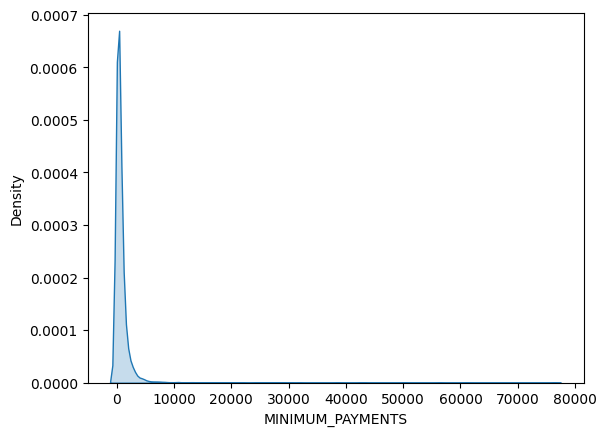

In [ ]:
sns.kdeplot(data['MINIMUM_PAYMENTS'], shade=True)

**Distribución de los datos después de la imputación**

<Axes: xlabel='MINIMUM_PAYMENTS', ylabel='Density'>

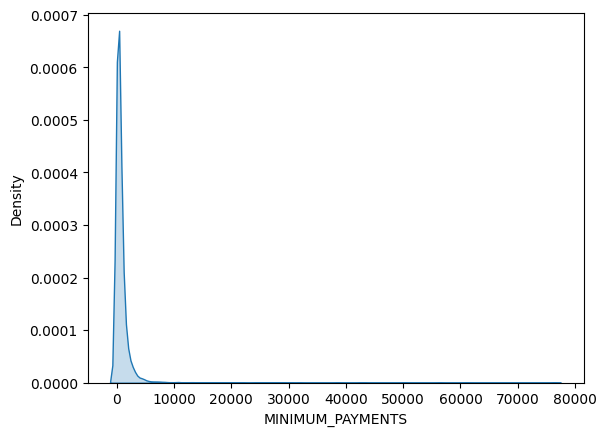

In [ ]:
sns.kdeplot(df['MINIMUM_PAYMENTS'],shade = True)

Se observa que al imputar los datos no hay una afectación significativa de la distribución de los datos, razón por la cual se considera una estrategia pertinente. Finalmente, eliminamos el registro que contiene el dato nulo de `CREDIT_LIMIT`

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Reducción de la dimensionalidad #

Escalamos los datos

In [ ]:
feat_sc = StandardScaler().fit_transform(df)

Inicialmente ajustamos un PCA con 17 componentes para posteriormente aplicar regla del codo.

In [ ]:
pca = PCA(n_components=17)
pca.fit(feat_sc)

PCA(n_components=17)

In [ ]:
ve = pca.explained_variance_ratio_

Aplicamos la regla de codo para observar el número de componentes óptimo

Text(0, 0.5, 'Varianza explicada')

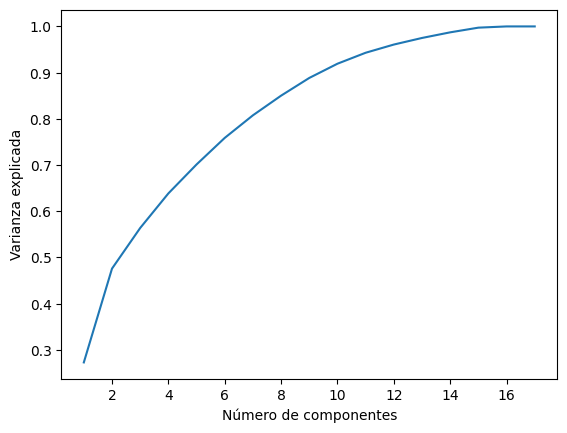

In [ ]:
sns.lineplot(x=np.arange(1,18), y = np.cumsum(ve), palette='viridis')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')

El número de componentes óptimo es de 2.

In [ ]:
pca = PCA(n_components=2)
pca.fit(feat_sc)

PCA(n_components=2)

**Vectores propios**

In [ ]:
pca.components_

array([[ 0.10100167,  0.11990311,  0.41167026,  0.34643121,  0.33683419,
        -0.02341368,  0.32149694,  0.29463743,  0.27471068, -0.08918264,
        -0.04872402,  0.39071594,  0.21166631,  0.2662278 ,  0.06031373,
         0.13211659,  0.08082738],
       [ 0.40397085,  0.13057917,  0.041112  ,  0.06293762, -0.01847888,
         0.43922333, -0.1907645 , -0.01787897, -0.1785832 ,  0.43406514,
         0.41970995, -0.01933207,  0.23871161,  0.25751332,  0.16697019,
        -0.19001642, -0.00443104]])

Los vectores propios nos indican el peso que tienen cada una de las variables del dataset original en las variables latentes generadas mediante el algoritmo PCA

In [ ]:
vp = pd.DataFrame(pca.components_)
vp.columns = [i for i in df.columns]
vp

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.101002,0.119903,0.411670,0.346431,0.336834,-0.023414,0.321497,0.294637,0.274711,-0.089183,-0.048724,0.390716,0.211666,0.266228,0.060314,0.132117,0.080827
1,0.403971,0.130579,0.041112,0.062938,-0.018479,0.439223,-0.190765,-0.017879,-0.178583,0.434065,0.419710,-0.019332,0.238712,0.257513,0.166970,-0.190016,-0.004431


Convertimos esto en un dataframe que tenga el nombre de cada variable para comprender cúales variables están teniendo mayor peso sobre las variables latentes generadas.

**Variable latente 1**
- Las variables originales `PURCHASES` y `PURCHASES_TRX` son las que mayor peso tienen sobre la variable latente 1; ` 0.411670` y `0.390716` respectivamente.

> Es de esperarse que la cuantía de los pagos y el número de transacciones de compra que realiza un cliente influya mucho sobre la caracterización del mismo. Esta variable está mayormente influenciado por esta información.


**Variable latente 2**
- Las variables originales `CASH_ADVANCE`, `CASH_ADVANCE_FREQUENCY` y `CASH_ADVANCE_TRX` tienen un mayor peso sobre la variable latente 2; ` 0.439223`, `0.434065 ` y ` 0.419710`, respectivamente.

> Para la variable latente 2, tenemos que el monto de los avances en efectivo a la tarjeta de crédito, la frecuencia de dichos avances y el número de avances en efectivo son las que mayor peso tienenl.

**Valores propios**

In [ ]:
pca.explained_variance_ratio_

array([0.27287777, 0.20302666])

Los valores propios representan la varianza explicada del total de los datos por las variables latentes seleccionadas. Se observa que la primer variable latente explica cerca del 30% de los datos, mientras la segunda explica cerca de un 20%.

Observamos las variables latentes

In [ ]:
l_sel = pca.transform(feat_sc)
l_sel

array([[-1.68236039, -1.07671938],
       [-1.13896732,  2.50611252],
       [ 0.96937749, -0.38342743],
       ...,
       [-0.92578521, -1.81049009],
       [-2.33621143, -0.65780175],
       [-0.55604365, -0.40016389]])

Analicemos graficamente los datos

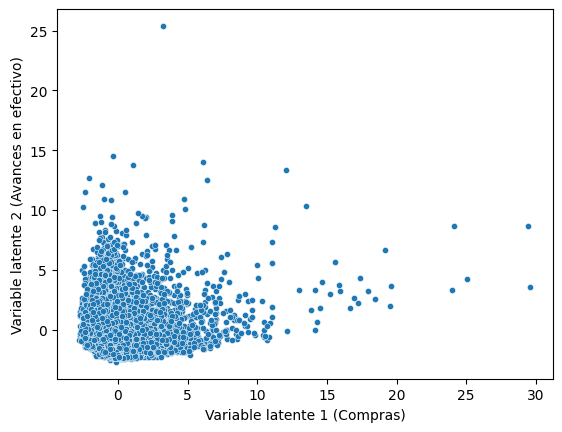

In [ ]:
sns.scatterplot(x = l_sel[:,0], y = l_sel[:,1], s = 20)
plt.xlabel('Variable latente 1 (Compras)')
plt.ylabel('Variable latente 2 (Avances en efectivo)')
plt.show()

El gráfico anterior nos está indicando características conjuntas en cuanto a al comportamiento de las compras y los avances en efectivo que hacen los clientes del banco. Veamos algunas observaciones:

- Nótese que para la mayoría de clientes, el comportamiento general de las compras es bajo, y el comportamiento general de sus avances en efectivo también es relativamente bajo (nube de puntos abarrotada).


- Hay algunos clientes representados por los puntos de la derecha, para los cuales el comportamiento general de las compras es alto, pero sus avances de efectivo son bajos.

- Finalmente, tenemos un cliente que hace muchos avances en efectivo y realiza pocas compras con tarjeta de crédito. Esto puede indicar que es un cliente a quien le sirve más el efectivo que efectuar pagos con sus tarjetas de crédito.

**Nota**: las variables latentes 1 y 2 NO representan unicamente las compras y los avances en efectivo; son variables que contienen mucha información. Simplemente se está analizando de esta manera porque esas variables originales tiene mayor peso sobre dichas latentes.

<Axes: ylabel='Density'>

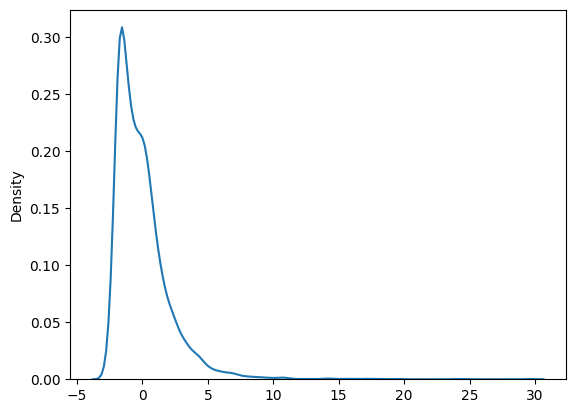

In [ ]:
sns.kdeplot(l_sel[:,0])

<Axes: ylabel='Density'>

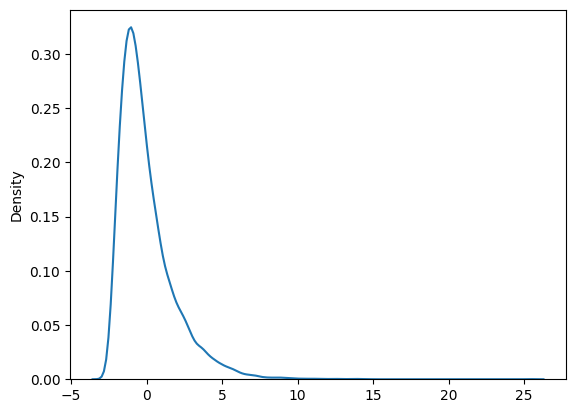

In [ ]:
sns.kdeplot(l_sel[:,1])

Observamos que los datos no tienen una distribución normal, razón por la cual utilizar una Gaussian Mixture Clustering no sería recomendable. Por otro lado, observamos en el espacio de características hay algunos datos atípicos que en el modelo K-Means sabemos que generará problemas en el recalculo de los nuevos centroides.

Por esta razón se decide utilizar un DBSCAN.

# DBSCAN #

Ajustamos el modelo a las variables latentes.

In [ ]:
db_clust = cluster.DBSCAN()
db_clust.fit(l_sel)

DBSCAN()

Observemos los cluster que genera el algoritmo inicialmente, sin tener en cuenta la optimización de hiperparámetros.

[]

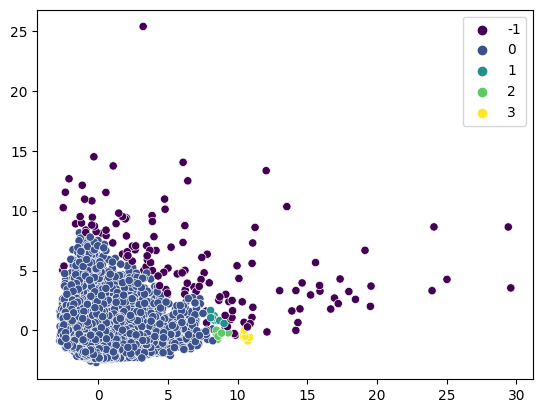

In [ ]:
sns.scatterplot(x=l_sel[:,0],y=l_sel[:,1], hue = db_clust.labels_, palette='viridis')
plt.plot()

## Optimización de los hiperparámetros ##

**Epsilon (eps)**

Se llama el algortimo K vecinos más cercanos inicialmente para encontrar el valor óptimo del epsilon, distancia máxima desde la observación hasta el límite del clustering.

In [123]:
knn = NearestNeighbors(n_neighbors=40)
knn.fit(l_sel)

NearestNeighbors(n_neighbors=40)

In [124]:
distance, *_ = knn.kneighbors(l_sel)

Calculamos las distancias promedio del primero con él mismo, luego el primero con el segundo más cercano, y así sucesivamente...

In [125]:
distance_prom = np.mean(distance,axis=0)
distance_prom

array([0.        , 0.04753628, 0.06948565, 0.08608492, 0.10059399,
       0.11362605, 0.12429093, 0.13418102, 0.14337871, 0.15207993,
       0.15980986, 0.16769598, 0.1748818 , 0.1819373 , 0.1885079 ,
       0.19479189, 0.20116426, 0.20731588, 0.21332975, 0.21936315,
       0.22534185, 0.23096144, 0.23639971, 0.24184089, 0.24696534,
       0.25199779, 0.25676016, 0.26149911, 0.26585691, 0.27029807,
       0.27480523, 0.27889754, 0.28308015, 0.28712937, 0.2912623 ,
       0.29518824, 0.29904563, 0.30280976, 0.30650682, 0.31009407])

Aplicamos la regla del codo para observar el valor óptimo del epsilon.

<Axes: >

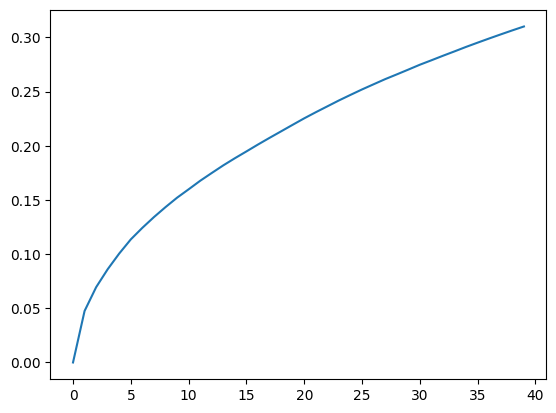

In [127]:
sns.lineplot(x=np.arange(0,40), y =distance_prom)

In [129]:
kl = KneeLocator(x=np.arange(0,40), y =distance_prom,curve='concave',direction= 'increasing')

In [130]:
kl.elbow

9

Observamos que la distancia que genera el codo es la ubicada en la posición 9 del vector de distancia promedio, vamos a tomar dos posiciones antes para definir nuestro epsilon.

In [134]:
eps = distance_prom[7]
eps

0.1341810166207223

**Mínimo de muestras (min_samples)**

In [136]:
from sklearn.metrics import silhouette_score

<Axes: >

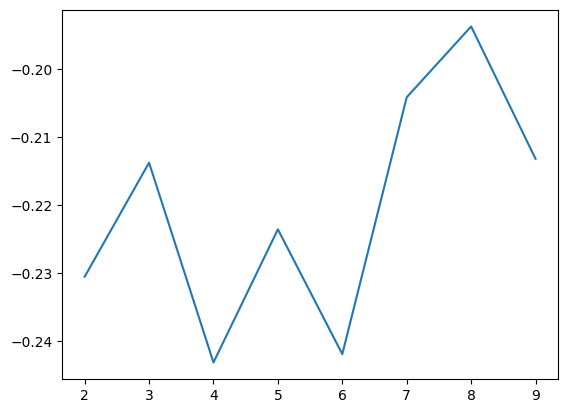

In [145]:
# Creamos un diccionario para ir guardando la métrica silhouette score
sil=[]



for ms in range(2, 10):
    db=cluster.DBSCAN(eps=eps, min_samples=ms)
    db.fit(l_sel)
    ss=silhouette_score(l_sel, db.labels_)
    sil.append(ss)


sns.lineplot(x=np.arange(2,10), y=sil, palette='viridis')

Al analizar los clusters en la inicialización del modelo, es visible que estos se encuentran muy cercanos entre si, por lo que los rangos del coeficiente de silueta ronda en valores negativos, ya que las observaciones de un mismo cluster están muy cercanos, sin embargo, estas observaciones también se encuentran muy cercanas a las observaciones de los otros cluster.

El número mínimo de muestras por clúster es de 8.

In [152]:
db_clust = cluster.DBSCAN(eps=0.13418102, min_samples=8)
db_clust.fit(l_sel)

DBSCAN(eps=0.13418102, min_samples=8)

In [153]:
db_clust.labels_

array([0, 0, 0, ..., 0, 0, 0])

[]

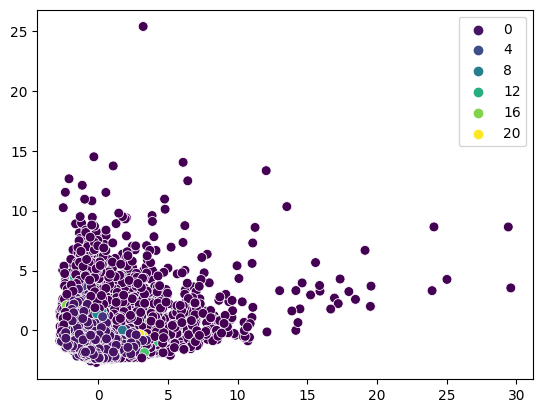

In [154]:
sns.scatterplot(x=l_sel[:,0],y=l_sel[:,1], hue = db_clust.labels_, palette='viridis', s = 50)
plt.plot()

Al evaluar los hiperparámetros Épsilon y Muestra mínima, el rendimiento del algoritmo no mostró una mejora. Esto puede llegar a ser dado que DBSCAN es pertinente utilizarlo cuando la densidad de las características se encuentra a distancias considerables o que se pueda diferenciar, en este caso las variables latentes se encuentran agrupadas de manera masiva en un solo espacio en conjunto con algunos atípicos, por lo que la segmentación por medio de este algoritmo no arroja buenos resultados para tomar decisiones frente a las estrategias de marketing en los clientes que usan tarjetas de créditos.

# K - Means

Observamos que el comportamiento de DSCAN() aún con la optimización de los hiperparámetros no es muy buena. Veamos cómo se comporta un K - Means.

In [156]:
from sklearn import cluster

Inicialmente deseamos observar el número de clústers ideal para los datos. Esto lo hacemos mediante la regla del codo, esta es una estrategia gráfica para encontrar el mejor K basándose en la métrica WCSS(Within-Cluster Sum of Square). Cuanto menor sea el valor de WCSS, más compactos son los clústeres, por tanto, queremos minimizar esta métrica.

<Axes: >

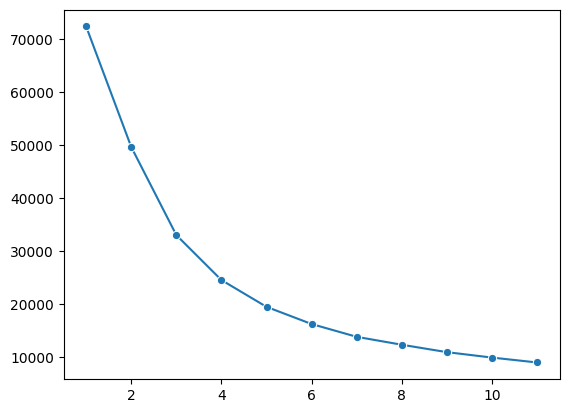

In [158]:
wcss=[]
sil=[]

for k in range(1,12):
    km=cluster.KMeans(n_clusters=k, n_init=10)
    km.fit(l_sel)
    wcss.append(km.inertia_) ##inertia = wcsss
    label=km.labels_
    if k>1:
        sil_avg=silhouette_score(l_sel,label )
        sil.append(sil_avg)

sns.lineplot(x=np.arange(1,12), y=wcss, marker="o", palette="viridis")


In [160]:
kl=KneeLocator(x=np.arange(1,12), y=wcss,curve="convex", direction="decreasing")
kl.elbow

4

Determinamos el valor de clústers que genera cambios significativos en WCSS, el cual es 4.

In [166]:
k=4 ### por contexto del problema

kmedias=cluster.KMeans(n_clusters=k) ## crea el modelo
kmedias.fit(l_sel) ## ajusta modelo a datos

KMeans(n_clusters=4)

In [164]:
cluster_label= kmedias.labels_ ##numeros de los cluster

In [168]:
centroides=kmedias.cluster_centers_ ## centroides

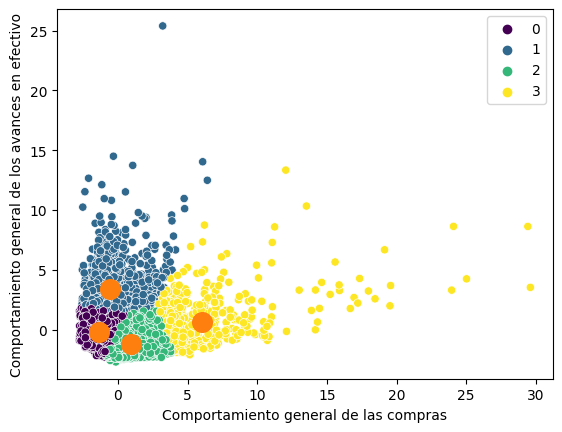

In [169]:
sns.scatterplot(x = l_sel[:,0], y = l_sel[:,1], hue = cluster_label, data = l_sel, palette = 'viridis')
plt.scatter(x=centroides[:,0], y = centroides[:,1], marker='o', s=200)
plt.xlabel('Comportamiento general de las compras')
plt.ylabel('Comportamiento general de los avances en efectivo')
plt.show()